# Imports

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Loading the Data

## Markdown Cells

In [28]:
md_filepath = '../markdown_group.csv'
md_original = pd.read_csv(md_filepath)

In [29]:
# create a variable where we will modify the dataframe
md_df = md_original.copy()

In [30]:
# initial look at the data
md_df.head()

,Unnamed: 0,nb_id,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,output_cell_prop,markdown_prop,num_contrib,...,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,num_headers,has_param,num_stars
0,3,594,True,False,False,False,0.507588,1.000000,0.044444,3.0,...,0.000000,1.000000,1.809524,False,False,0.0,False,7.0,False,10.0
1,6,1222,True,False,False,False,1.000000,0.000000,0.161290,1.0,...,0.961538,1.000000,0.000000,False,False,0.0,False,5.0,False,0.0
2,7,1447,True,False,False,False,0.970851,0.011364,0.375887,1.0,...,0.988636,1.000000,0.000000,False,True,15.0,False,30.0,False,0.0
3,12,2705,True,False,False,False,1.000000,0.500000,0.461538,1.0,...,0.000000,0.923077,1.615385,False,False,6.0,False,7.0,False,0.0
4,15,2861,True,False,False,True,1.000000,0.214286,0.461538,1.0,...,0.000000,1.000000,6.333333,False,False,0.0,False,1.0,False,0.0


In [31]:
# drop the first two columns
md_df = md_df.drop(['Unnamed: 0', 'nb_id'], axis = 1)

In [32]:
# get the datatypes so we can isolate the quantitative variables for binning
list(enumerate(zip(md_df.columns, md_df.dtypes)))

[(0, ('longer_beginning', dtype('bool'))),
 (1, ('longer_ending', dtype('bool'))),
 (2, ('has_author', dtype('bool'))),
 (3, ('has_equation', dtype('bool'))),
 (4, ('jupyter_prop', dtype('float64'))),
 (5, ('output_cell_prop', dtype('float64'))),
 (6, ('markdown_prop', dtype('float64'))),
 (7, ('num_contrib', dtype('float64'))),
 (8, ('image_prop', dtype('float64'))),
 (9, ('is_education', dtype('bool'))),
 (10, ('has_links', dtype('bool'))),
 (11, ('has_comments', dtype('bool'))),
 (12, ('md_frequency', dtype('float64'))),
 (13, ('has_title', dtype('bool'))),
 (14, ('num_commits', dtype('float64'))),
 (15, ('md_format', dtype('bool'))),
 (16, ('non_exec_prop', dtype('float64'))),
 (17, ('exec_inorder', dtype('float64'))),
 (18, ('exec_skips', dtype('float64'))),
 (19, ('has_error', dtype('bool'))),
 (20, ('has_export', dtype('bool'))),
 (21, ('num_functions', dtype('float64'))),
 (22, ('has_test', dtype('bool'))),
 (23, ('num_headers', dtype('float64'))),
 (24, ('has_param', dtype('bo

In [33]:
# isolate the quantitative variables
md_quant_vars = [md_df.columns[i] for i in [4, 5, 6, 7, 8, 12, 14, 16, 17, 18, 21, 23, 25]]
md_quant_vars

['jupyter_prop',
 'output_cell_prop',
 'markdown_prop',
 'num_contrib',
 'image_prop',
 'md_frequency',
 'num_commits',
 'non_exec_prop',
 'exec_inorder',
 'exec_skips',
 'num_functions',
 'num_headers',
 'num_stars']

In [34]:
# dataframe of just quantitative variables
md_quant_df = md_df[md_quant_vars]

In [35]:
# initial look at the quantitative data
md_quant_df.head()

,jupyter_prop,output_cell_prop,markdown_prop,num_contrib,image_prop,md_frequency,num_commits,non_exec_prop,exec_inorder,exec_skips,num_functions,num_headers,num_stars
0,0.507588,1.000000,0.044444,3.0,0.0,0.068182,1.0,0.000000,1.000000,1.809524,0.0,7.0,10.0
1,1.000000,0.000000,0.161290,1.0,0.0,0.333333,2.0,0.961538,1.000000,0.000000,0.0,5.0,0.0
2,0.970851,0.011364,0.375887,1.0,0.0,0.621429,1.0,0.988636,1.000000,0.000000,15.0,30.0,0.0
3,1.000000,0.500000,0.461538,1.0,0.0,0.640000,1.0,0.000000,0.923077,1.615385,6.0,7.0,0.0
4,1.000000,0.214286,0.461538,1.0,0.0,0.520000,1.0,0.000000,1.000000,6.333333,0.0,1.0,0.0


## No Markdown Cells

In [36]:
no_md_filepath = '../no_markdown_group.csv'
no_md_original = pd.read_csv(no_md_filepath)

In [37]:
# create a variable where we will modify the dataframe
no_md_df = no_md_original.copy()

In [38]:
# initial look at the data
no_md_df.head()

,Unnamed: 0,nb_id,has_author,jupyter_prop,output_cell_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,has_param,num_stars
0,8,1589,False,0.714130,0.538462,1.0,0.142857,False,False,1.0,0.00000,1.000000,1.000000,False,True,2.0,False,False,1.0
1,10,1919,False,0.997840,0.780488,1.0,0.187500,False,True,1.0,0.04878,0.789474,10.631579,True,True,5.0,False,False,1.0
2,14,2857,False,0.121957,0.461538,5.0,0.000000,False,True,11.0,0.00000,0.909091,6.181818,False,True,0.0,False,False,4.0
3,27,4339,False,1.000000,0.190476,1.0,0.000000,False,True,1.0,0.00000,1.000000,1.631579,False,False,1.0,False,False,0.0
4,29,4659,False,0.940063,0.125000,3.0,0.000000,False,True,3.0,0.12500,1.000000,1.000000,True,False,3.0,False,False,0.0


In [39]:
# drop the first two columns
no_md_df = no_md_df.drop(['Unnamed: 0', 'nb_id'], axis = 1)

In [40]:
# get the datatypes so we can isolate the quantitative variables for binning
list(enumerate(zip(no_md_df.columns, no_md_df.dtypes)))

[(0, ('has_author', dtype('bool'))),
 (1, ('jupyter_prop', dtype('float64'))),
 (2, ('output_cell_prop', dtype('float64'))),
 (3, ('num_contrib', dtype('float64'))),
 (4, ('image_prop', dtype('float64'))),
 (5, ('is_education', dtype('bool'))),
 (6, ('has_comments', dtype('bool'))),
 (7, ('num_commits', dtype('float64'))),
 (8, ('non_exec_prop', dtype('float64'))),
 (9, ('exec_inorder', dtype('float64'))),
 (10, ('exec_skips', dtype('float64'))),
 (11, ('has_error', dtype('bool'))),
 (12, ('has_export', dtype('bool'))),
 (13, ('num_functions', dtype('float64'))),
 (14, ('has_test', dtype('bool'))),
 (15, ('has_param', dtype('bool'))),
 (16, ('num_stars', dtype('float64')))]

In [41]:
# isolate the quantitative variables
no_md_quant_vars = [no_md_df.columns[i] for i in [1, 2, 3, 4, 7, 8, 9, 10, 13, 16]]
no_md_quant_vars

['jupyter_prop',
 'output_cell_prop',
 'num_contrib',
 'image_prop',
 'num_commits',
 'non_exec_prop',
 'exec_inorder',
 'exec_skips',
 'num_functions',
 'num_stars']

In [42]:
# dataframe of just quantitative variables
no_md_quant_df = no_md_df[no_md_quant_vars]

In [43]:
# initial look at the quantitative data
no_md_quant_df.head()

,jupyter_prop,output_cell_prop,num_contrib,image_prop,num_commits,non_exec_prop,exec_inorder,exec_skips,num_functions,num_stars
0,0.714130,0.538462,1.0,0.142857,1.0,0.00000,1.000000,1.000000,2.0,1.0
1,0.997840,0.780488,1.0,0.187500,1.0,0.04878,0.789474,10.631579,5.0,1.0
2,0.121957,0.461538,5.0,0.000000,11.0,0.00000,0.909091,6.181818,0.0,4.0
3,1.000000,0.190476,1.0,0.000000,1.0,0.00000,1.000000,1.631579,1.0,0.0
4,0.940063,0.125000,3.0,0.000000,3.0,0.12500,1.000000,1.000000,3.0,0.0


# Binning the Data

In [44]:
two_labels = ['low', 'high']

## Markdown Cells

In [45]:
# create a copy of the dataframe that we will play with 
md_quant_binned = md_quant_df.copy()

In [46]:
# attempt to bin the quant variables as-is
for quant_var in md_quant_binned.columns:
    md_quant_binned[quant_var] = pd.cut(md_quant_binned[quant_var], 2, labels = two_labels)

In [47]:
# initial look at the binned data
md_quant_binned.head()

,jupyter_prop,output_cell_prop,markdown_prop,num_contrib,image_prop,md_frequency,num_commits,non_exec_prop,exec_inorder,exec_skips,num_functions,num_headers,num_stars
0,high,high,low,low,low,low,low,low,high,low,low,low,low
1,high,low,low,low,low,low,low,high,high,low,low,low,low
2,high,low,low,low,low,high,low,high,high,low,low,low,low
3,high,low,low,low,low,high,low,low,high,low,low,low,low
4,high,low,low,low,low,high,low,low,high,low,low,low,low


In [48]:
# check the bin counts
for quant_var in md_quant_binned.columns:
    print(md_quant_binned[quant_var].value_counts())

high    2003
low      288
Name: jupyter_prop, dtype: int64
high    1381
low      910
Name: output_cell_prop, dtype: int64
low     1763
high     528
Name: markdown_prop, dtype: int64
low     2255
high      36
Name: num_contrib, dtype: int64
low     1721
high     570
Name: image_prop, dtype: int64
high    1434
low      857
Name: md_frequency, dtype: int64
low     2266
high      25
Name: num_commits, dtype: int64
low     2081
high     210
Name: non_exec_prop, dtype: int64
high    2268
low       23
Name: exec_inorder, dtype: int64
low     2284
high       7
Name: exec_skips, dtype: int64
low     2287
high       4
Name: num_functions, dtype: int64
low     2233
high      58
Name: num_headers, dtype: int64
low     2268
high      23
Name: num_stars, dtype: int64


Based on this, the variables we should try to modify are:

- `num_contrib` - log + 0.5
- `num_commits` - log + 0.5
- `exec_inorder` - square
- `exec_skips` - log + 0.5
- `num_functions` - log + 0.5
- `num_headers` - square root
- `num_stars` - log + 0.5

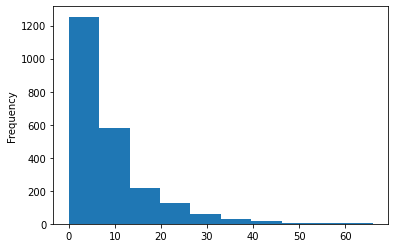

In [49]:
# create  a copy of the num_headers column that we will play with
md_num_headers = md_quant_df['num_headers'].copy()

# plot the data
md_num_headers.plot(kind = 'hist')

Since the data is right-skewed, we can try to square root the data

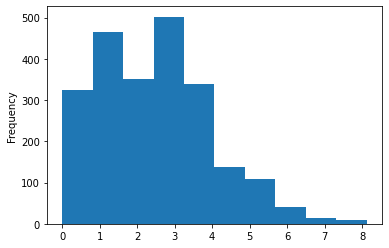

In [50]:
# transform the column
md_num_headers = md_num_headers.transform(lambda x : math.sqrt(x))

# plot the column again
md_num_headers.plot(kind = 'hist')

In [51]:
# try to bin the data again
md_num_headers = pd.cut(md_num_headers, 2, labels = two_labels)

# check bin counts
md_num_headers.value_counts()

low     1983
high     308
Name: num_headers, dtype: int64

In [52]:
# python dictionary of quantitative fields transformations
md_quant_trans = {
    'jupyter_prop': lambda x : x,
    'markdown_prop': lambda x : x,
    'num_contrib': lambda x : math.log(x + 0.5),
    'image_prop': lambda x : x,
    'output_cell_prop': lambda x : x,
    'md_frequency': lambda x : x,
    'num_commits': lambda x : math.log(x + 0.5),
    'non_exec_prop': lambda x : x,
    'exec_inorder': lambda x : x ** 2,
    'exec_skips': lambda x : math.log(x + 0.5),
    'num_functions': lambda x : math.log(x + 0.5),
    'num_headers': lambda x : math.sqrt(x),
    'num_stars': lambda x : math.log(x + 0.5)
}

In [53]:
# create the dataframe that we will perform binning on
md_binary_df = md_original.copy()

In [54]:
# bin the quant variables
for quant_var in md_quant_vars:
    
    # get the transformation and perform
    transformation = md_quant_trans[quant_var]
    md_binary_df[quant_var] = md_binary_df[quant_var].apply(transformation)
    
    # bin the data
    md_binary_df[quant_var] = pd.cut(md_binary_df[quant_var], 2, labels = two_labels)

In [55]:
# initial look at the binned data
md_binary_df.head()

,Unnamed: 0,nb_id,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,output_cell_prop,markdown_prop,num_contrib,...,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,num_headers,has_param,num_stars
0,3,594,True,False,False,False,high,high,low,low,...,low,high,low,False,False,low,False,low,False,high
1,6,1222,True,False,False,False,high,low,low,low,...,high,high,low,False,False,low,False,low,False,low
2,7,1447,True,False,False,False,high,low,low,low,...,high,high,low,False,True,high,False,high,False,low
3,12,2705,True,False,False,False,high,low,low,low,...,low,high,low,False,False,low,False,low,False,low
4,15,2861,True,False,False,True,high,low,low,low,...,low,high,low,False,False,low,False,low,False,low


In [56]:
# clear the first column
md_binary_df = md_binary_df.drop(['Unnamed: 0'], axis = 1)

In [57]:
# check the bin counts
for quant_var in md_quant_vars:
    print(md_binary_df[quant_var].value_counts())

high    2003
low      288
Name: jupyter_prop, dtype: int64
high    1381
low      910
Name: output_cell_prop, dtype: int64
low     1763
high     528
Name: markdown_prop, dtype: int64
low     2140
high     151
Name: num_contrib, dtype: int64
low     1721
high     570
Name: image_prop, dtype: int64
high    1434
low      857
Name: md_frequency, dtype: int64
low     1981
high     310
Name: num_commits, dtype: int64
low     2081
high     210
Name: non_exec_prop, dtype: int64
high    2180
low      111
Name: exec_inorder, dtype: int64
low     1925
high     366
Name: exec_skips, dtype: int64
low     1752
high     539
Name: num_functions, dtype: int64
low     1983
high     308
Name: num_headers, dtype: int64
low     2133
high     158
Name: num_stars, dtype: int64


In [58]:
# export binary data to a csv
md_binary_df.to_csv('markdown_group_binary.csv')

## No Markdown Cells

In [59]:
# create a copy of the dataframe that we will play with
no_md_quant_binned = no_md_quant_df.copy()

In [60]:
# attempt to bin the quant variables as-is
for quant_var in no_md_quant_binned.columns:
    no_md_quant_binned[quant_var] = pd.cut(no_md_quant_binned[quant_var], 2, labels = two_labels)

In [61]:
# initial look at the binned data
no_md_quant_binned.head()

,jupyter_prop,output_cell_prop,num_contrib,image_prop,num_commits,non_exec_prop,exec_inorder,exec_skips,num_functions,num_stars
0,high,high,low,low,low,low,high,low,low,low
1,high,high,low,low,low,low,high,low,low,low
2,low,low,low,low,low,low,high,low,low,low
3,high,low,low,low,low,low,high,low,low,low
4,high,low,low,low,low,low,high,low,low,low


In [62]:
# check the bin counts
for quant_var in no_md_quant_binned.columns:
    print(no_md_quant_binned[quant_var].value_counts())

high    1263
low       91
Name: jupyter_prop, dtype: int64
low     841
high    513
Name: output_cell_prop, dtype: int64
low     1347
high       7
Name: num_contrib, dtype: int64
low     1101
high     253
Name: image_prop, dtype: int64
low     1353
high       1
Name: num_commits, dtype: int64
low     1248
high     106
Name: non_exec_prop, dtype: int64
high    1289
low       65
Name: exec_inorder, dtype: int64
low     1353
high       1
Name: exec_skips, dtype: int64
low     1348
high       6
Name: num_functions, dtype: int64
low     1350
high       4
Name: num_stars, dtype: int64


Based on this, the variables we should try to modify are:

- `jupyter_prop`: square
- `num_contrib`: log + 0.5
- `num_commits`: fourth root
- `exec_inorder`: square
- `exec_skips`: log + 0.5
- `num_functions`: log + 0.5
- `num_stars`: log + 0.5

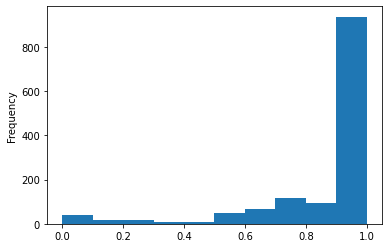

In [63]:
# create a copy of the jupyter_prop column that we will play with
no_md_jupyter_prop = no_md_quant_df['jupyter_prop'].copy()

# plot the data
no_md_jupyter_prop.plot(kind = 'hist')

Since the data is left-skewed, we can try to square the data

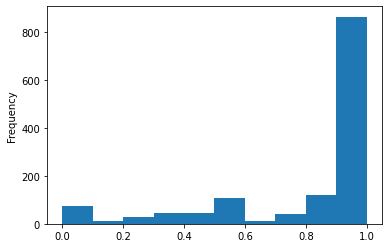

In [64]:
# transform the column
no_md_jupyter_prop = no_md_jupyter_prop.transform(lambda x : x ** 2)

# plot the column again
no_md_jupyter_prop.plot(kind = 'hist')

In [65]:
# try to bin the data again
no_md_jupyter_prop = pd.cut(no_md_jupyter_prop, 2, labels = two_labels)

# check bin counts
no_md_jupyter_prop.value_counts()

high    1148
low      206
Name: jupyter_prop, dtype: int64

In [66]:
# python dictionary of quantitative fields transformations
no_md_quant_trans = {
    'jupyter_prop': lambda x : x ** 2,
    'num_contrib': lambda x : math.log(x + 0.5),
    'image_prop': lambda x : x,
    'output_cell_prop': lambda x : x,
    'num_commits': lambda x : x ** (1. / 4),
    'non_exec_prop': lambda x : x,
    'exec_inorder': lambda x : x ** 2,
    'exec_skips': lambda x : math.log(x + 0.5),
    'num_functions': lambda x : math.log(x + 0.5),
    'num_stars': lambda x : math.log(x + 0.5)
}

In [67]:
# create the dataframe that we will perform binning on
no_md_binary_df = no_md_original.copy()

In [68]:
# bin the quant variables
for quant_var in no_md_quant_vars:
    
    # get the transformation and perform 
    transformation = no_md_quant_trans[quant_var]
    no_md_binary_df[quant_var] = no_md_binary_df[quant_var].apply(transformation)
    
    # bin the data
    no_md_binary_df[quant_var] = pd.cut(no_md_binary_df[quant_var], 2, labels = two_labels)

In [69]:
# initial look at the binned data
no_md_binary_df.head()

,Unnamed: 0,nb_id,has_author,jupyter_prop,output_cell_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,has_param,num_stars
0,8,1589,False,high,high,low,low,False,False,low,low,high,low,False,True,low,False,False,low
1,10,1919,False,high,high,low,low,False,True,low,low,high,low,True,True,low,False,False,low
2,14,2857,False,low,low,high,low,False,True,high,low,high,low,False,True,low,False,False,low
3,27,4339,False,high,low,low,low,False,True,low,low,high,low,False,False,low,False,False,low
4,29,4659,False,high,low,low,low,False,True,high,low,high,low,True,False,low,False,False,low


In [70]:
# drop the first column
no_md_binary_df = no_md_binary_df.drop(['Unnamed: 0'], axis = 1)

In [71]:
# check the bin counts
for quant_var in no_md_quant_vars:
    print(no_md_binary_df[quant_var].value_counts())

high    1148
low      206
Name: jupyter_prop, dtype: int64
low     841
high    513
Name: output_cell_prop, dtype: int64
low     1236
high     118
Name: num_contrib, dtype: int64
low     1101
high     253
Name: image_prop, dtype: int64
low     1041
high     313
Name: num_commits, dtype: int64
low     1248
high     106
Name: non_exec_prop, dtype: int64
high    1204
low      150
Name: exec_inorder, dtype: int64
low     1178
high     176
Name: exec_skips, dtype: int64
low     1153
high     201
Name: num_functions, dtype: int64
low     1299
high      55
Name: num_stars, dtype: int64


In [75]:
# export binary data to a csv
no_md_binary_df.to_csv('no_markdown_group_binary.csv')